In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install natsort

In [ ]:
import os
import numpy as np
from natsort import natsorted

In [ ]:
# Directory containing chunked .npy files
data_dir = "/content/drive/MyDrive/data_chunks"
output_dir = "/content/drive/MyDrive/processed_chunks"

In [ ]:
# Create output directory if it doesn’t exist
os.makedirs(output_dir, exist_ok=True)

In [ ]:
# List all .npy files and sort naturally
file_list = natsorted([f for f in os.listdir(data_dir) if f.endswith(".npy")])

OSError: [Errno 5] Input/output error: '/content/drive/MyDrive/data_chunks'

In [ ]:
# Define batch sizes
batch_size = 20000  # Load 20K files at a time
merge_group = 4     # Merge every 4 processed files

In [ ]:
processed_files = []
temp_storage = []

In [ ]:
import numpy as np
import os
import glob
from tqdm import tqdm
from sklearn.model_selection import train_test_split

# ✅ Set Data Path
DATA_PATH = "/content/drive/MyDrive/data_chunks"
SAVE_PATH = "/content/drive/MyDrive/processed_data"
# os.makedirs(SAVE_PATH, exist_ok=True)

# List all .npy files and sort naturally
# file_list = natsorted([f for f in os.listdir(data_dir) if f.endswith(".npy")])


In [ ]:
print(f"📂 Found {len(file_list)} chunk files.")

📂 Found 80000 chunk files.


In [ ]:
print("🔍 Sample file paths:", file_list[:5])  # Print first 5 files

🔍 Sample file paths: ['data_chunk_0.npy', 'data_chunk_1.npy', 'data_chunk_2.npy', 'data_chunk_3.npy', 'data_chunk_4.npy']


In [ ]:
import os
print("📂 Files in Directory:", os.listdir(DATA_PATH)[:10])  # List first 10 files

📂 Files in Directory: ['data_chunk_79000.npy', 'data_chunk_79001.npy', 'data_chunk_79002.npy', 'data_chunk_79003.npy', 'data_chunk_79004.npy', 'data_chunk_79005.npy', 'data_chunk_79006.npy', 'data_chunk_79007.npy', 'data_chunk_79008.npy', 'data_chunk_79009.npy']


In [ ]:
# ✅ Define batch size (20K files per batch)
batch_size = 20000
num_batches = len(file_list) // batch_size

for batch_idx in range(3,4):
    print(f"\n🚀 Processing Batch {batch_idx + 1}/{num_batches}")

    # ✅ Preallocate lists
    X_data = []
    y_data = []

    # ✅ Get batch files
    batch_files = file_list[batch_idx * batch_size : (batch_idx + 1) * batch_size]

    # ✅ Load batch files
    for file in tqdm(batch_files, desc=f"📊 Loading Batch {batch_idx + 1}"):
        file_path = os.path.join(DATA_PATH, os.path.basename(file))
        data = np.load(file_path, mmap_mode='r')

        # ✅ Skip if shape is invalid
        if data.shape[1] < 3:
            continue

        X_chunk = data[:, 0]  # Features
        y_label = int(data[0, 2])  # Label

        X_data.append(X_chunk)
        y_data.append(y_label)

    # ✅ Convert batch to NumPy array
    X_data = np.array(X_data, dtype=np.float32)
    y_data = np.array(y_data, dtype=np.int32)

    # ✅ Save batch file
    batch_file = os.path.join(SAVE_PATH, f"batch_{batch_idx + 1}.npy")
    np.save(batch_file, {"X": X_data, "y": y_data})
    print(f"✅ Saved {batch_file}")

# ✅ Merge All Batches
print("\n🔗 Merging All Batches...")


🚀 Processing Batch 4/4


📊 Loading Batch 4: 100%|██████████| 20000/20000 [1:18:53<00:00,  4.22it/s]


✅ Saved /content/drive/MyDrive/processed_data/batch_4.npy

🔗 Merging All Batches...


In [ ]:
import numpy as np
import os

# ✅ Define paths
SAVE_PATH = "/content/drive/MyDrive/processed_data"
final_file = os.path.join(SAVE_PATH, "final_dataset.npy")

# ✅ Initialize an empty list for merging
X_final = []

# ✅ Load each batch and concatenate
for batch_idx in range(4):
    batch_file = os.path.join(SAVE_PATH, f"batch_{batch_idx + 1}.npy")

    # Load batch
    batch_data = np.load(batch_file, allow_pickle=True).item()

    # Append only 'X' data (shape: 20K, 25K)
    X_final.append(batch_data["X"])

# ✅ Concatenate along rows (axis=0) to get (80K, 25K)
X_final = np.concatenate(X_final, axis=0)

# ✅ Save final dataset as `.npy`
np.save(final_file, X_final, allow_pickle=True)

print(f"🎯 Final Dataset Saved: {final_file}")


🎯 Final Dataset Saved: /content/drive/MyDrive/processed_data/final_dataset.npy


In [ ]:
import numpy as np

# ✅ Load the saved dataset
final_file = "/content/drive/MyDrive/processed_data/final_dataset.npy"
X_final = np.load(final_file, allow_pickle=True)

# ✅ Print the shape
print("Shape of Final Dataset:", X_final.shape)


Shape of Final Dataset: (80000, 25000)


In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

# Split dataset (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42, stratify=y_final)

# Print shapes
print("✅ X_train shape:", X_train.shape)
print("✅ X_test shape:", X_test.shape)
print("✅ y_train shape:", y_train.shape)
print("✅ y_test shape:", y_test.shape)


✅ X_train shape: (64000, 25000)
✅ X_test shape: (16000, 25000)
✅ y_train shape: (64000, 4)
✅ y_test shape: (16000, 4)


In [ ]:
import numpy as np
import os

# Define save path
save_dir = "/content/drive/MyDrive/processed_data"

# Create directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Convert labels to float32 for consistency
y_train = y_train.astype(np.float32)
y_test = y_test.astype(np.float32)

# Save data to .npy files
np.save(os.path.join(save_dir, "X_train.npy"), X_train)
np.save(os.path.join(save_dir, "X_test.npy"), X_test)
np.save(os.path.join(save_dir, "y_train.npy"), y_train)
np.save(os.path.join(save_dir, "y_test.npy"), y_test)

print("✅ Data saved successfully at:", save_dir)


✅ Data saved successfully at: /content/drive/MyDrive/processed_data


In [ ]:
print("✅ X_train shape:", X_train.shape)
print("✅ X_test shape:", X_test.shape)
print("✅ y_train shape:", y_train.shape)
print("✅ y_test shape:", y_test.shape)
print("✅ Data type of X_train:", X_train.dtype)
print("✅ Data type of y_train:", y_train.dtype)


✅ X_train shape: (64000, 25000)
✅ X_test shape: (16000, 25000)
✅ y_train shape: (64000, 4)
✅ y_test shape: (16000, 4)
✅ Data type of X_train: float32
✅ Data type of y_train: float32


In [ ]:
# ✅ Save Model
model.save('/content/drive/MyDrive/processed_data/LSTM_model.h5')

print("✅ Model training complete & saved!")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import os

# Define load path
load_dir = "/content/drive/MyDrive/processed_data"

# Load data
X_train = np.load(os.path.join(load_dir, "X_train.npy"))
X_test = np.load(os.path.join(load_dir, "X_test.npy"))
y_train = np.load(os.path.join(load_dir, "y_train.npy"))
y_test = np.load(os.path.join(load_dir, "y_test.npy"))

# Verify shapes
print("✅ Data Loaded Successfully!")
print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"X_test shape: {X_test.shape}, dtype: {X_test.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")

# Function to create overlapping sequences within each sample
def create_das_sequences_per_sample(data, seq_length=25000, overlap=5000):
    """
    Create overlapping sequences from DAS fiber optic data per sample.

    Parameters:
    data: Raw DAS signal data (shape: (n_samples, signal_length))
    seq_length: Length of each sequence
    overlap: Number of samples to overlap between sequences

    Returns:
    Array of overlapping sequences (shape: (n_samples * n_sequences_per_sample, seq_length, 1))
    """
    stride = seq_length - overlap
    n_samples, signal_length = data.shape
    n_sequences_per_sample = max(1, (signal_length - seq_length) // stride + 1)

    # Initialize new array to store sequences
    sequences = np.zeros((n_samples * n_sequences_per_sample, seq_length, 1))

    idx = 0  # Keeps track of sequence index
    for sample_idx in range(n_samples):
        for seq_idx in range(n_sequences_per_sample):
            start_idx = seq_idx * stride
            end_idx = start_idx + seq_length
            if end_idx <= signal_length:
                sequences[idx, :, 0] = data[sample_idx, start_idx:end_idx]
            else:
                # Handle last sequence if it extends beyond available data
                sequences[idx, :signal_length - start_idx, 0] = data[sample_idx, start_idx:]
            idx += 1

    return sequences

# Apply function to X_train and X_test
X_train_seq = create_das_sequences_per_sample(X_train)
X_test_seq = create_das_sequences_per_sample(X_test)
# y_train_seq = create_das_sequences_per_sample(y_train)
# y_test_seq = create_das_sequences_per_sample(y_test)

# Verify new shapes
print(f"X_train_seq shape: {X_train_seq.shape}")  # Should be (n_samples * n_sequences_per_sample, 25000, 1)
print(f"X_test_seq shape: {X_test_seq.shape}")  # Should be (n_samples * n_sequences_per_sample, 25000, 1)


✅ Data Loaded Successfully!
X_train shape: (64000, 25000), dtype: float32
X_test shape: (16000, 25000), dtype: float32
y_train shape: (64000, 4), dtype: float32
y_test shape: (16000, 4), dtype: float32


In [ ]:
import numpy as np
import os

# Define load path
load_dir = "/content/drive/MyDrive/processed_data"

# Load data
X_train = np.load(os.path.join(load_dir, "X_train.npy"))
X_test = np.load(os.path.join(load_dir, "X_test.npy"))
y_train = np.load(os.path.join(load_dir, "y_train.npy"))
y_test = np.load(os.path.join(load_dir, "y_test.npy"))

# Verify shapes and data types
print("✅ Data Loaded Successfully!")
print(f"X_train shape: {X_train.shape}, dtype: {X_train.dtype}")
print(f"X_test shape: {X_test.shape}, dtype: {X_test.dtype}")
print(f"y_train shape: {y_train.shape}, dtype: {y_train.dtype}")
print(f"y_test shape: {y_test.shape}, dtype: {y_test.dtype}")


✅ Data Loaded Successfully!
X_train shape: (64000, 25000), dtype: float32
X_test shape: (16000, 25000), dtype: float32
y_train shape: (64000, 4), dtype: float32
y_test shape: (16000, 4), dtype: float32


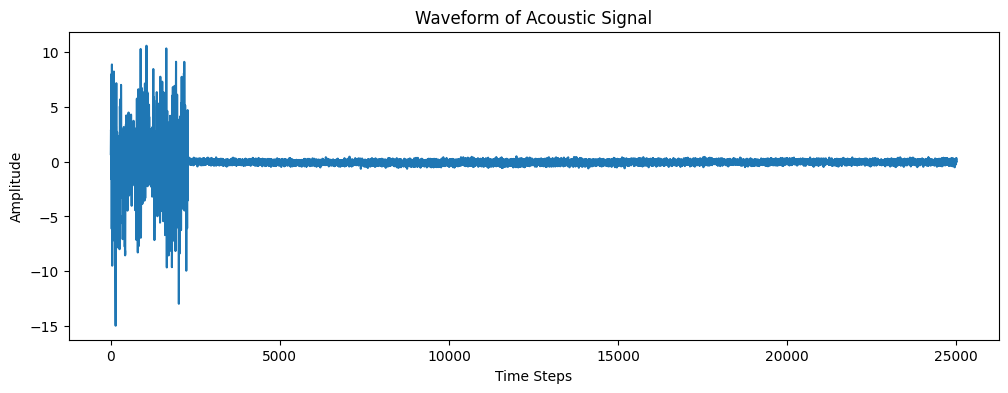

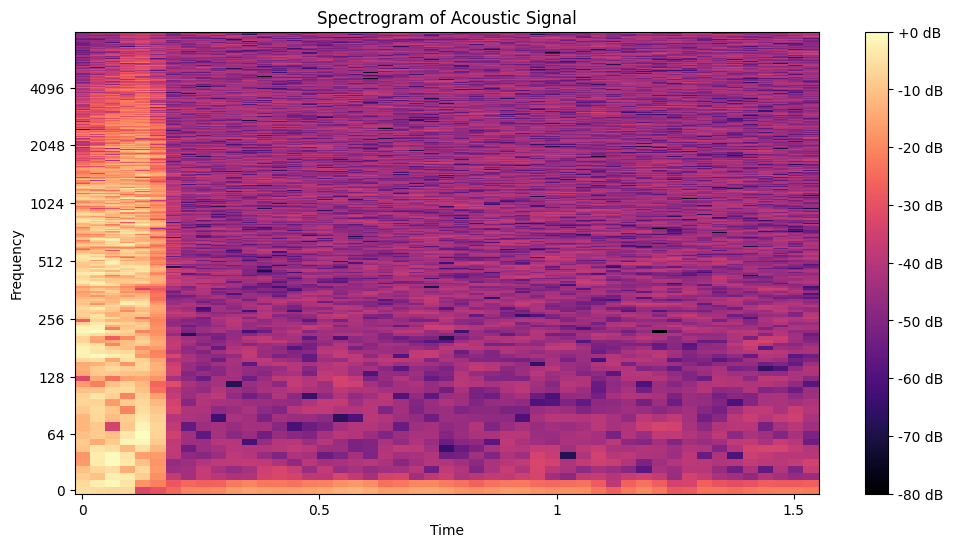

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load your raw acoustic signal (assuming it's stored in `X_train[0]`)
sample_signal = X_train[0]  # Select one sample

# Set sampling rate (Assumption: 16kHz for acoustic signals)
sr = 16000

# Plot **Waveform**
plt.figure(figsize=(12, 4))
plt.plot(sample_signal)
plt.title("Waveform of Acoustic Signal")
plt.xlabel("Time Steps")
plt.ylabel("Amplitude")
plt.show()

# Compute **Spectrogram (Short-Time Fourier Transform)**
D = librosa.amplitude_to_db(np.abs(librosa.stft(sample_signal)), ref=np.max)

# Plot **Spectrogram**
plt.figure(figsize=(12, 6))
librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram of Acoustic Signal")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

# 📂 Paths (Change as needed)
load_dir = "/content/drive/MyDrive"
save_dir = "/content/drive/MyDrive/DAS_visualizations"

# Load Dataset
X_train = np.load(os.path.join(load_dir, "X_train.npy"))

# Ensure output folders exist
waveform_dir = os.path.join(save_dir, "waveforms")
resized_waveform_dir = os.path.join(save_dir, "waveforms_resized")
os.makedirs(waveform_dir, exist_ok=True)
os.makedirs(resized_waveform_dir, exist_ok=True)

# Get existing files to avoid reprocessing
# existing_files = set(os.listdir(waveform_dir))

# Target image size
IMG_HEIGHT, IMG_WIDTH = 256, 256

# Function to plot and save waveform
def plot_waveform(index, signal):
    save_path = os.path.join(waveform_dir, f"waveform_{index}.png")
    plt.figure(figsize=(10, 4))
    plt.plot(signal)
    plt.title(f"Waveform - Sample {index}")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
    plt.close()

# Function to resize while maintaining aspect ratio (with white padding)
def resize_image(image_path, index):
    img = cv2.imread(image_path)
    orig_h, orig_w = img.shape[:2]

    # Compute scale while maintaining aspect ratio
    scale = min(IMG_WIDTH / orig_w, IMG_HEIGHT / orig_h)
    new_w = int(orig_w * scale)
    new_h = int(orig_h * scale)

    # Resize image
    resized_img = cv2.resize(img, (new_w, new_h))

    # Create white background
    padded_img = np.full((IMG_HEIGHT, IMG_WIDTH, 3), 255, dtype=np.uint8)

    # Center the resized image
    x_offset = (IMG_WIDTH - new_w) // 2
    y_offset = (IMG_HEIGHT - new_h) // 2
    padded_img[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized_img

    # Save resized image
    save_path = os.path.join(resized_waveform_dir, f"waveform_{index}.png")
    cv2.imwrite(save_path, padded_img)

# Generate and process waveforms
for i in tqdm(range(41597,len(X_train)), desc="Generating & Resizing Waveforms"):
    img_filename = f"waveform_{i}.png"
    img_path = os.path.join(waveform_dir, img_filename)

    # Generate waveform if missing
    plot_waveform(i, X_train[i])

    # Resize and save the waveform
    resize_image(img_path, i)

print(f"✅ Waveforms saved in {waveform_dir} and resized images saved in {resized_waveform_dir}")


Generating & Resizing Waveforms:  77%|███████▋  | 17336/22403 [1:20:50<16:53,  5.00it/s]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

# 📂 Paths (Change as needed)
load_dir = "/content/drive/MyDrive"
save_dir = "/content/drive/MyDrive/DAS_visualizations"

# Load Dataset
y_train = np.load(os.path.join(load_dir, "y_train.npy"))

# Ensure output folders exist
waveform_dir = os.path.join(save_dir, "waveforms")
resized_waveform_dir = os.path.join(save_dir, "waveforms_resized")
os.makedirs(waveform_dir, exist_ok=True)
os.makedirs(resized_waveform_dir, exist_ok=True)

# Get existing files to avoid reprocessing
# existing_files = set(os.listdir(waveform_dir))

# Target image size
IMG_HEIGHT, IMG_WIDTH = 256, 256

# Function to plot and save waveform
def plot_waveform(index, signal):
    save_path = os.path.join(waveform_dir, f"waveform_{index}.png")
    plt.figure(figsize=(10, 4))
    plt.plot(signal)
    plt.title(f"Waveform - Sample {index}")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.savefig(save_path, bbox_inches='tight', pad_inches=0.1)
    plt.close()

# Function to resize while maintaining aspect ratio (with white padding)
def resize_image(image_path, index):
    img = cv2.imread(image_path)
    orig_h, orig_w = img.shape[:2]

    # Compute scale while maintaining aspect ratio
    scale = min(IMG_WIDTH / orig_w, IMG_HEIGHT / orig_h)
    new_w = int(orig_w * scale)
    new_h = int(orig_h * scale)

    # Resize image
    resized_img = cv2.resize(img, (new_w, new_h))

    # Create white background
    padded_img = np.full((IMG_HEIGHT, IMG_WIDTH, 3), 255, dtype=np.uint8)

    # Center the resized image
    x_offset = (IMG_WIDTH - new_w) // 2
    y_offset = (IMG_HEIGHT - new_h) // 2
    padded_img[y_offset:y_offset + new_h, x_offset:x_offset + new_w] = resized_img

    # Save resized image
    save_path = os.path.join(resized_waveform_dir, f"waveform_{index}.png")
    cv2.imwrite(save_path, padded_img)

# Generate and process waveforms
for i in tqdm(range(len(y_train)), desc="Generating & Resizing Waveforms"):
    img_filename = f"waveform_{i}.png"
    img_path = os.path.join(waveform_dir, img_filename)

    # Generate waveform if missing
    plot_waveform(i, y_train[i])

    # Resize and save the waveform
    resize_image(img_path, i)

print(f"✅ Waveforms saved in {waveform_dir} and resized images saved in {resized_waveform_dir}")


In [ ]:
img_filename = f"waveform_{417}.png"
img_path = os.path.join(waveform_dir, img_filename)

# Generate waveform if missing
plot_waveform(417, X_train[417])

# Resize and save the waveform
resize_image(img_path, 417)

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

# Load Data
load_dir = "/content/drive/MyDrive/processed_data"
save_dir = "/content/drive/MyDrive/DAS_visualizations"

X_train = np.load(os.path.join(load_dir, "X_train.npy"))

# Ensure output folder exists
spectrogram_dir = os.path.join(save_dir, "spectrograms")
os.makedirs(spectrogram_dir, exist_ok=True)

# Set Sampling Rate
sr = 16000

# Function to plot and save spectrogram
def plot_spectrogram(index, signal):
    save_path = os.path.join(spectrogram_dir, f"spectrogram_{index}.png")
    plt.figure(figsize=(10, 4))
    D = librosa.amplitude_to_db(np.abs(librosa.stft(signal)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis="time", y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram - Sample {index}")
    plt.savefig(save_path)
    plt.close()

# Process all samples
num_samples = X_train.shape[0]  # 64000

for i in tqdm(range(num_samples), desc="Generating Spectrograms"):
    plot_spectrogram(i, X_train[i])

print(f"✅ Spectrogram images saved in {spectrogram_dir}")


In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load Data
load_dir = "/content/drive/MyDrive/processed_data"
save_dir = "/content/drive/MyDrive/DAS_visualizations"  # Output folder

X_train = np.load(os.path.join(load_dir, "X_train.npy"))

# Ensure output folders exist
waveform_dir = os.path.join(save_dir, "waveforms")
spectrogram_dir = os.path.join(save_dir, "spectrograms")

os.makedirs(waveform_dir, exist_ok=True)
os.makedirs(spectrogram_dir, exist_ok=True)

# Function to plot and save waveform
def plot_waveform(signal, index, save_path):
    plt.figure(figsize=(10, 4))
    plt.plot(signal)
    plt.title(f"Waveform of Acoustic Signal - Sample {index}")
    plt.xlabel("Time Steps")
    plt.ylabel("Amplitude")
    plt.grid()
    plt.savefig(save_path)
    plt.close()

# Function to plot and save spectrogram
def plot_spectrogram(signal, index, save_path, sr=16000, n_fft=512, hop_length=256):
    plt.figure(figsize=(10, 4))
    S = np.abs(librosa.stft(signal, n_fft=n_fft, hop_length=hop_length))
    S_db = librosa.amplitude_to_db(S, ref=np.max)

    librosa.display.specshow(S_db, sr=sr, hop_length=hop_length, x_axis="time", y_axis="log")
    plt.colorbar(format="%+2.0f dB")
    plt.title(f"Spectrogram - Sample {index}")
    plt.savefig(save_path)
    plt.close()

# Process and save first 5 samples
num_samples = 5
for i in range(num_samples):
    signal = X_train[i]  # Extract sample

    # Save waveform
    waveform_path = os.path.join(waveform_dir, f"waveform_{i}.png")
    plot_waveform(signal, i, waveform_path)

    # Save spectrogram
    spectrogram_path = os.path.join(spectrogram_dir, f"spectrogram_{i}.png")
    plot_spectrogram(signal, i, spectrogram_path)

print(f"✅ All files saved in {save_dir}")


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import os

In [ ]:
# Check for GPU availability
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"Using {len(gpus)} GPU(s) with memory growth enabled")
    except RuntimeError as e:
        print(f"GPU memory configuration error: {e}")

In [ ]:
# Reshape data to add feature dimension for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(f"Training data shape after reshaping: {X_train.shape}")
print(f"Testing data shape after reshaping: {X_test.shape}")

Training data shape after reshaping: (64000, 25000, 1)
Testing data shape after reshaping: (16000, 25000, 1)


In [ ]:
# Build LSTM model
def build_das_model(input_shape, num_classes=4):
    model = Sequential([
        # First Bidirectional LSTM layer
        Bidirectional(LSTM(64, return_sequences=True,
                     dropout=0.2, recurrent_dropout=0.2),
                     input_shape=input_shape),

        BatchNormalization(),

        # Second LSTM layer
        LSTM(128, return_sequences=False,
             dropout=0.3, recurrent_dropout=0.3),

        BatchNormalization(),

        # Dense classification layers
        Dense(64, activation='relu'),
        Dropout(0.4),
        Dense(num_classes, activation='softmax')
    ])

    # Compile with Adam optimizer
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='categorical_crossentropy',  # Using categorical since y is one-hot encoded
        metrics=['accuracy']
    )

    return model

In [ ]:
# Create model
model = build_das_model(input_shape=(X_train.shape[1], 1))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 25000, 128)          │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 25000, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,916 (683.27 KB)

 Trainable params: 174,404 (681.27 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
# Define callbacks
callbacks = [
    ModelCheckpoint(
        'best_das_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    ),
    EarlyStopping(
        monitor='val_loss',
        patience=7,
        mode='min',
        restore_best_weights=True,
        verbose=1
    ),
    ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-6,
        verbose=1
    )
]

In [ ]:
# Train the model with a smaller batch size to save memory
batch_size = 16  # Adjust based on your GPU memory
history = model.fit(
    X_train_seq, y_train,
    validation_split=0.15,  # Hold back some training data for validation
    batch_size=batch_size,
    epochs=20,
    callbacks=callbacks,
    verbose=1
)

In [ ]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f"Test accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

In [ ]:
# Plot training history
plt.figure(figsize=(12, 5))

In [ ]:
# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('DAS Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

In [ ]:
# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DAS Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

In [ ]:
plt.tight_layout()
plt.savefig('das_training_history.png')
plt.show()

In [ ]:
# Make predictions on test data for visualization
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

cm = confusion_matrix(y_true_classes, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.savefig('das_confusion_matrix.png')
plt.show()

In [ ]:
# Print classification report
print("Classification Report:")
print(classification_report(y_true_classes, y_pred_classes))

Training data shape after reshaping: (64000, 25000, 1)
Testing data shape after reshaping: (16000, 25000, 1)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 25000, 128)          │          33,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 25000, 128)          │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 128)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             260 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,916 (683.27 KB)

 Trainable params: 174,404 (681.27 KB)

 Non-trainable params: 512 (2.00 KB)

In [ ]:
# Save the model
model.save('final_das_fiber_optic_model.h5')
print("Model saved to 'final_das_fiber_optic_model.h5'")